# Analysing Ebay car sales data
- __The aim of this project is to use an ebay dataset of car sales and gain some insights and check the relationship between the price and mileage of the cars__

In [1]:
import numpy as np
import pandas as pd

autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [2]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

## Observations
- The names have many characters to clean up
- The gearbox column is not translated into english yet


In [6]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
autos.columns = ['date_crawled','name','seller','offer_type','price','ab_test','vehicle_type','registration_year','gearbox','power_ps','mode1','odometer','registration_month','fuel_type','brand','unrepaired_damage','ad_created','num_of_pictures','postal_code','last_seen']

In [8]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,mode1,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### The column headings were cleaned up before by converting the camelcase names into snakecase names (manually)

In [9]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,mode1,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [10]:
autos['price'].iloc[0]

480

### The columns labelled 'price' and 'odometer' are numerical values but in str format. These will be converted into int format in the following cells.

In [11]:
# autos['price'] = (autos['price']
# .str.replace('$','')
# .str.replace(',','')
# .str.replace(' ','')
# .astype(int))

In [12]:
autos.rename({'price':'price_dollar'}, axis = 1, inplace = True)

In [13]:
# autos['odometer'] = (autos['odometer']
#                      .str.replace('km','')
#                      .str.replace(',','')
#                     .str.replace(' ','')
#                     .astype(int))

In [14]:
autos.rename({'odometer':'odometer_km'}, axis = 1, inplace = True)

In [15]:
autos.head()

,date_crawled,name,seller,offer_type,price_dollar,ab_test,vehicle_type,registration_year,gearbox,power_ps,mode1,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [16]:
autos['price_dollar'].unique().shape

(5597,)

In [17]:
autos['price_dollar'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price_dollar, dtype: float64

In [18]:
autos['price_dollar'].value_counts().sort_index(ascending = False).head()

2147483647     1
99999999      15
99000000       1
74185296       1
32545461       1
Name: price_dollar, dtype: int64

In [19]:
autos[autos['price_dollar'].between(1000, 2000)]['price_dollar']

3         1500
10        2000
17        1750
19        1850
28        1990
          ... 
371511    1999
371515    1690
371516    1490
371521    1150
371524    1199
Name: price_dollar, Length: 67374, dtype: int64

In [20]:
autos[autos['price_dollar'].between(10000000, 99999999)]

,date_crawled,name,seller,offer_type,price_dollar,ab_test,vehicle_type,registration_year,gearbox,power_ps,mode1,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
14663,2016-04-03 06:03:56,Tausch_moeglich_Polo_vw_n9,privat,Angebot,11111111,control,coupe,2003,manuell,64,polo,150000,2,benzin,volkswagen,NaN,2016-04-03 00:00:00,0,46535,2016-04-07 10:16:51
20746,2016-03-08 15:54:52,Golf3_Schlachtfest,privat,Angebot,12345678,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-08 00:00:00,0,18516,2016-03-17 16:15:43
39625,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,privat,Angebot,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,0,14542,2016-04-06 23:17:31
54295,2016-03-08 11:51:40,Mazda_5_2.0_CD_DPF_Exclusive,privat,Angebot,10000000,control,bus,2007,manuell,143,5_reihe,150000,2,diesel,mazda,nein,2016-03-08 00:00:00,0,83301,2016-03-10 14:17:16
54507,2016-03-09 11:40:15,Tausch_DKW_F8_gegen_Lanz_Bulldog,privat,Angebot,11111111,test,andere,1953,manuell,20,NaN,150000,5,NaN,audi,nein,2016-03-09 00:00:00,0,7774,2016-04-05 14:46:32
56973,2016-03-18 18:52:27,tausche_ford_mondeo_mk3_ghia_gegen_anderes_auto,privat,Angebot,99999999,control,limousine,2002,manuell,131,mondeo,150000,1,NaN,ford,NaN,2016-03-18 00:00:00,0,27574,2016-03-18 18:52:27
69747,2016-03-20 10:59:32,Suche_Mercedes_Benz_r_klasse_cdi,privat,Angebot,99999999,control,bus,2006,NaN,0,andere,150000,0,diesel,mercedes_benz,NaN,2016-03-20 00:00:00,0,86916,2016-04-06 07:45:57
77520,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,privat,Angebot,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,0,73525,2016-04-06 05:15:30
87799,2016-03-08 20:39:05,Leasinguebernahme,privat,Angebot,27322222,control,limousine,2014,manuell,163,c4,40000,2,diesel,citroen,NaN,2016-03-08 00:00:00,0,76532,2016-03-08 20:39:05
90853,2016-04-01 05:36:16,Verkaufe_oder_Tausche,privat,Angebot,11111111,control,NaN,2018,NaN,0,NaN,150000,0,NaN,bmw,NaN,2016-04-01 00:00:00,0,6682,2016-04-05 02:46:37


In [21]:
autos[autos['price_dollar'].between(10000000, 99999999)]['price_dollar'].value_counts().sort_index(ascending = False)

99999999    15
99000000     1
74185296     1
32545461     1
27322222     1
14000500     1
12345678     9
11111111    10
10010011     1
10000000     8
Name: price_dollar, dtype: int64

In [22]:
autos['last_seen']

0         2016-04-07 03:16:57
1         2016-04-07 01:46:50
2         2016-04-05 12:47:46
3         2016-03-17 17:40:17
4         2016-04-06 10:17:21
                 ...         
371523    2016-04-06 00:46:52
371524    2016-03-11 18:17:12
371525    2016-04-07 07:15:26
371526    2016-03-24 12:45:21
371527    2016-03-22 03:17:10
Name: last_seen, Length: 371528, dtype: object

In [23]:
autos['last_seen'].str[:10]

0         2016-04-07
1         2016-04-07
2         2016-04-05
3         2016-03-17
4         2016-04-06
             ...    
371523    2016-04-06
371524    2016-03-11
371525    2016-04-07
371526    2016-03-24
371527    2016-03-22
Name: last_seen, Length: 371528, dtype: object

In [24]:
autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:06:22    0.000003
2016-03-05 14:06:23    0.000003
2016-03-05 14:06:24    0.000008
2016-03-05 14:06:25    0.000005
2016-03-05 14:06:26    0.000003
                         ...   
2016-04-07 14:36:54    0.000003
2016-04-07 14:36:55    0.000003
2016-04-07 14:36:56    0.000005
2016-04-07 14:36:57    0.000003
2016-04-07 14:36:58    0.000003
Name: date_crawled, Length: 280500, dtype: float64

In [25]:
autos['ad_created'].value_counts(normalize=True, dropna=False).sort_index()

2014-03-10 00:00:00    0.000003
2015-03-20 00:00:00    0.000003
2015-06-11 00:00:00    0.000003
2015-06-18 00:00:00    0.000003
2015-08-07 00:00:00    0.000003
                         ...   
2016-04-03 00:00:00    0.038893
2016-04-04 00:00:00    0.037741
2016-04-05 00:00:00    0.011655
2016-04-06 00:00:00    0.003155
2016-04-07 00:00:00    0.001558
Name: ad_created, Length: 114, dtype: float64

In [26]:
autos['last_seen'].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05 14:15:08    0.000003
2016-03-05 14:15:16    0.000003
2016-03-05 14:15:39    0.000003
2016-03-05 14:18:30    0.000003
2016-03-05 14:25:59    0.000003
                         ...   
2016-04-07 14:58:47    0.000024
2016-04-07 14:58:48    0.000024
2016-04-07 14:58:49    0.000030
2016-04-07 14:58:50    0.000030
2016-04-07 14:58:51    0.000003
Name: last_seen, Length: 182806, dtype: float64

### The above three lines calcualted the distribution of the values in each of those 3 columns. It was intteressting to see how the column that is based on the website had the same time of 00:00:00 for all rows. This was not the case for the other two columns (date_crawled and last_seen) which were added by the crawler

In [27]:
autos['registration_year'].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

### The above cell shows that according to the data the earliest (min) registration year is '1000' and that the latest (max) registration is '9999'. This is not possible, because in the year 1000 cars were not invented yet and we are only in 2021, which is more than 7000 years away from 9999.

### Next, we will count the number of listings with cars that fall outside the 1886 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic

In [28]:
max_year = autos['registration_year']<=2016
min_year = autos['registration_year']>=1900
range_year = max_year & min_year

autos_valid_reg = autos[range_year] #making a new filtered dataframe

autos_valid_reg['registration_year'].value_counts(normalize=True)

2000    0.068813
1999    0.063812
2005    0.062548
2006    0.056702
2001    0.056668
          ...   
1925    0.000003
1920    0.000003
1919    0.000003
1915    0.000003
1911    0.000003
Name: registration_year, Length: 97, dtype: float64

In [29]:
autos_valid_reg['registration_year'].describe()

count    356780.000000
mean       2002.779805
std           7.395775
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2016.000000
Name: registration_year, dtype: float64

### The earliest registration is in the year 1910 and the most recent registration is in the year 2016. The mean is 2002, this shows that most of the cars that are listed were made in the last century

In [30]:
selected_brands = autos_valid_reg['brand'].value_counts().head(20)
selected_brands

volkswagen        75777
bmw               39137
opel              38200
mercedes_benz     34235
audi              31879
ford              24564
renault           16968
peugeot           10653
fiat               9190
seat               6647
skoda              5497
mazda              5476
smart              5032
citroen            4950
nissan             4841
toyota             4548
sonstige_autos     3799
hyundai            3507
mini               3286
volvo              3257
Name: brand, dtype: int64

### The top 20 brands that are most common were selected to be aggregated on

In [31]:
brand_dict = {}

for brand_name in selected_brands.index:
    brand_only = autos_valid_reg['brand'] == brand_name
    autos_brand_only = autos_valid_reg[brand_only]
    brand_dict[brand_name] = autos_brand_only['price_dollar'].mean()

sorted(brand_dict.items(),key=lambda x : x[1], reverse = True)

[('sonstige_autos', 642492.4772308503),
 ('mercedes_benz', 17614.74929166058),
 ('audi', 16218.259230214248),
 ('bmw', 14798.226103176023),
 ('volkswagen', 13643.476727767),
 ('mini', 9979.38496652465),
 ('citroen', 9167.919797979797),
 ('ford', 8702.476062530532),
 ('skoda', 6460.418046207022),
 ('mazda', 5796.058619430241),
 ('hyundai', 5487.679498146564),
 ('toyota', 5263.365875109938),
 ('volvo', 5100.101627264354),
 ('nissan', 4585.39599256352),
 ('seat', 4420.369038664059),
 ('fiat', 4146.933841131665),
 ('smart', 3586.280802861685),
 ('opel', 3248.27832460733),
 ('peugeot', 3206.2663099596357),
 ('renault', 2366.3506011315417)]

### Observation: Citroen brand is the most expensive car brand in this data set

In [32]:
bmp_series = pd.Series(brand_dict)

In [33]:
brand_mileage_dict = {}

for brand_name in selected_brands.index:
    brand_only = autos_valid_reg['brand'] == brand_name
    autos_brand_only = autos_valid_reg[brand_only]
    brand_mileage_dict[brand_name] = autos_brand_only['odometer_km'].mean()

sorted(brand_mileage_dict.items(),key=lambda x : x[1], reverse = True)

[('volvo', 138101.01320233344),
 ('bmw', 132657.07642384444),
 ('mercedes_benz', 130580.6922739886),
 ('audi', 129491.20110417517),
 ('opel', 128755.89005235602),
 ('volkswagen', 128337.16035208573),
 ('renault', 127875.7072135785),
 ('mazda', 125949.59824689555),
 ('peugeot', 124599.64329296912),
 ('ford', 123618.09965803615),
 ('seat', 120916.20279825485),
 ('citroen', 120296.9696969697),
 ('nissan', 119543.48275149762),
 ('toyota', 117337.29111697449),
 ('fiat', 116519.5865070729),
 ('skoda', 113720.21102419501),
 ('hyundai', 104302.82292557742),
 ('smart', 99684.02225755167),
 ('mini', 93566.64637857578),
 ('sonstige_autos', 86637.27296657015)]

In [34]:
bmm_series = pd.Series(brand_mileage_dict)
bmm_series

volkswagen        128337.160352
bmw               132657.076424
opel              128755.890052
mercedes_benz     130580.692274
audi              129491.201104
ford              123618.099658
renault           127875.707214
peugeot           124599.643293
fiat              116519.586507
seat              120916.202798
skoda             113720.211024
mazda             125949.598247
smart              99684.022258
citroen           120296.969697
nissan            119543.482751
toyota            117337.291117
sonstige_autos     86637.272967
hyundai           104302.822926
mini               93566.646379
volvo             138101.013202
dtype: float64

In [35]:
df = pd.DataFrame(bmp_series, columns = ['mean_price'])
df['mean_mileage'] = bmm_series
df

,mean_price,mean_mileage
volkswagen,13643.476728,128337.160352
bmw,14798.226103,132657.076424
opel,3248.278325,128755.890052
mercedes_benz,17614.749292,130580.692274
audi,16218.259230,129491.201104
ford,8702.476063,123618.099658
renault,2366.350601,127875.707214
peugeot,3206.266310,124599.643293
fiat,4146.933841,116519.586507
seat,4420.369039,120916.202798


In [36]:
df = df.drop('sonstige_autos', axis=0)

In [37]:
import matplotlib.pyplot as plt

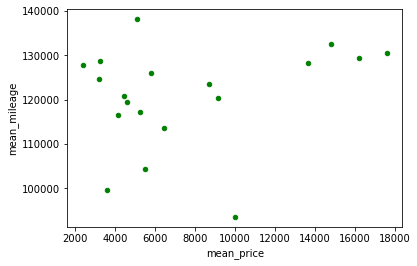

In [38]:
lines = df.plot.scatter(x='mean_price', y='mean_mileage', color='green')
plt.show()

### Observation: There seems to be a weak correlation between the price and the mileage, where most cars that have a high mileage are also cheaper than the rest of the cars.